https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
# Load Packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Data
test = yf.download("TSLA FB", start='2018-01-01', end='2019-12-31')
test.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close  ...       Open    Volume          
                    FB       TSLA          FB  ...       TSLA        FB      TSLA
Date                                           ...                               
2018-01-02  181.419998  64.106003  181.419998  ...  62.400002  18151900  21761000
2018-01-03  184.669998  63.450001  184.669998  ...  64.199997  16886600  22607500
2018-01-04  184.330002  62.924000  184.330002  ...  62.574001  13880900  49731500
2018-01-05  186.850006  63.316002  186.850006  ...  63.324001  13574500  22956000
2018-01-08  188.279999  67.281998  188.279999  ...  63.200001  17994700  49297000

[5 rows x 12 columns]

In [4]:
# Closing price
test = test['Adj Close']
test.head()

,FB,TSLA
Date,,
2018-01-02,181.419998,64.106003
2018-01-03,184.669998,63.450001
2018-01-04,184.330002,62.924000
2018-01-05,186.850006,63.316002
2018-01-08,188.279999,67.281998


Step 2: Calculate percentage change in stock prices

In [5]:
## Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
#print(tesla.head())
## Variance
var_tesla = tesla.var()
#print(var_tesla)

## Log of Percentage change for Facebook
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
#print(fb.head())
var_fb = fb.var()
#print(var_fb)

In [6]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
#print(tesla_vol, fb_vol)
#test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [7]:
## Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
#print(test1.head())

## Covariance
test1['TSLA'].cov(test1['FB'])

## Corrlelation
test1['TSLA'].corr(test1['FB'])

0.25202411248669204

In [8]:
#Expected Returns
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r = (e_r_ind*w).sum()
e_r

0.00045893450391333476

7. Building an optimal risky portfolio


In [9]:
# Import data
df = yf.download("AAPL NKE GOOGL AMZN", start='2015-01-01', end='2019-12-31')
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                          ...   Volume                  
                 AAPL        AMZN       GOOGL  ...     AMZN    GOOGL      NKE
Date                                           ...                           
2015-01-02  24.745998  308.519989  529.549988  ...  2783200  1324000  4985800
2015-01-05  24.048862  302.190002  519.460022  ...  2774200  2059100  6889200
2015-01-06  24.051128  295.290009  506.640015  ...  3519000  2722800  7576000
2015-01-07  24.388378  298.420013  505.149994  ...  2640300  2345900  7256000
2015-01-08  25.325432  300.459991  506.910004  ...  3088400  3652700  5978200

[5 rows x 24 columns]

In [ ]:
df = df['Adj Close']
df.head()

,AAPL,AMZN,GOOGL,NKE
Date,,,,
2015-01-02,24.745995,308.519989,529.549988,44.185089
2015-01-05,24.048861,302.190002,519.460022,43.473709
2015-01-06,24.051123,295.290009,506.640015,43.217976
2015-01-07,24.388374,298.420013,505.149994,44.110706
2015-01-08,25.325438,300.459991,506.910004,45.128956


8. Covariance and Correlation matrix


In [ ]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AAPL,AMZN,GOOGL,NKE
AAPL,0.000246,0.000142,0.000122,0.000084
AMZN,0.000142,0.000334,0.000176,0.000092
GOOGL,0.000122,0.000176,0.000222,0.000085
NKE,0.000084,0.000092,0.000085,0.000219


In [ ]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AAPL,AMZN,GOOGL,NKE
AAPL,1.000000,0.496660,0.524875,0.360849
AMZN,0.496660,1.000000,0.647941,0.341554
GOOGL,0.524875,0.647941,1.000000,0.387465
NKE,0.360849,0.341554,0.387465,1.000000


9. Portfolio Variance


In [ ]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016092119720680887

In [ ]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

AAPL     0.357854
AMZN     0.295745
GOOGL    0.155478
NKE      0.160666
dtype: float64

In [ ]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20480656783771933

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AAPL     0.247871
AMZN     0.288770
GOOGL    0.235375
NKE      0.233916
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.357854,0.247871
AMZN,0.295745,0.288770
GOOGL,0.155478,0.235375
NKE,0.160666,0.233916


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,GOOGL weight,NKE weight
0,0.231881,0.211704,0.042106,0.473335,0.197671,0.286887
1,0.261431,0.216391,0.241874,0.404528,0.303166,0.050432
2,0.257749,0.192107,0.404947,0.129890,0.060393,0.404770
3,0.252106,0.197460,0.459324,0.020667,0.371007,0.149002
4,0.250104,0.198314,0.396050,0.098618,0.381574,0.123758


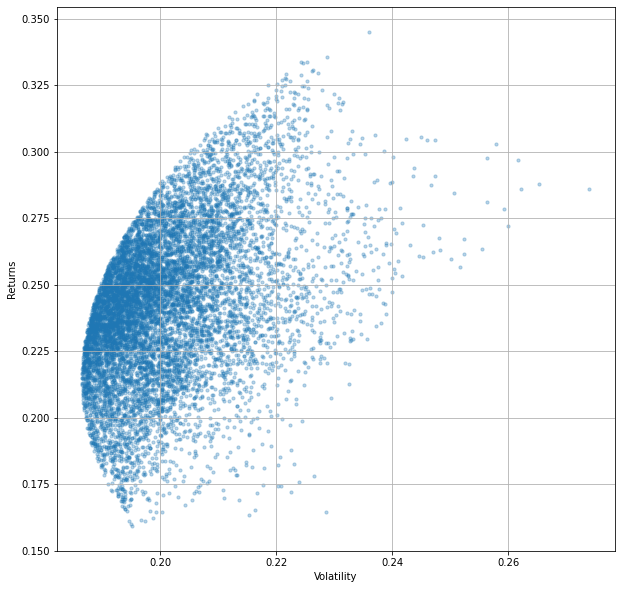

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.216389
Volatility      0.186592
AAPL weight     0.268386
AMZN weight     0.032361
GOOGL weight    0.302825
NKE weight      0.396428
Name: 8325, dtype: float64

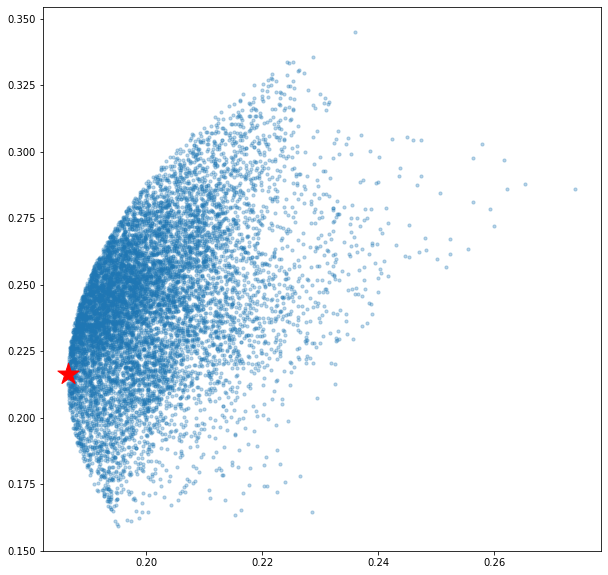

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.333611
Volatility      0.224205
AAPL weight     0.724891
AMZN weight     0.222332
GOOGL weight    0.005318
NKE weight      0.047460
Name: 3638, dtype: float64

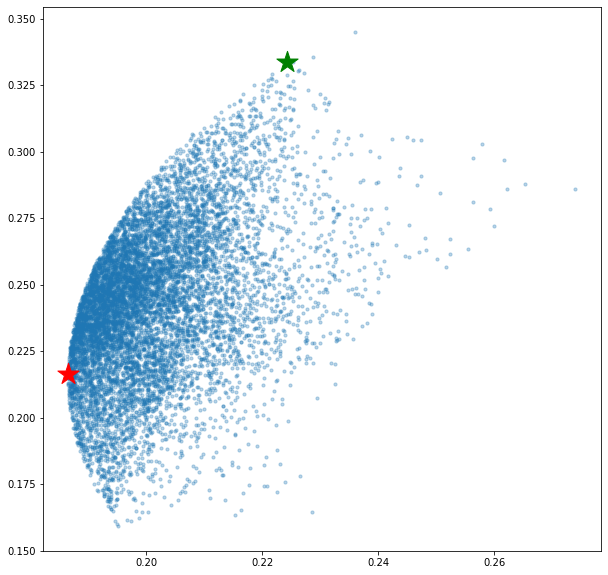

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)